In [14]:
%%writefile tiny.c
int main(void) {
    return 42;
}

Overwriting tiny.c


In [15]:
!gcc -o tiny_binary tiny.c
!file tiny_binary
!ls -l tiny_binary

tiny_binary: ELF 64-bit LSB pie executable, x86-64, version 1 (SYSV), dynamically linked, interpreter /lib64/ld-linux-x86-64.so.2, BuildID[sha1]=787aa8a69d8f5f0417c509f1d253a114bd0d08fe, for GNU/Linux 3.2.0, not stripped
-rwxr-xr-x 1 root root 15776 Feb 14 21:00 tiny_binary


In [16]:
import base64

with open("tiny_binary", "rb") as f:
    b64 = base64.b64encode(f.read()).decode("ascii")

print(b64[:200], "...")   # preview
print("Length:", len(b64))


f0VMRgIBAQAAAAAAAAAAAAMAPgABAAAAQBAAAAAAAABAAAAAAAAAAGA2AAAAAAAAAAAAAEAAOAANAEAAHQAcAAYAAAAEAAAAQAAAAAAAAABAAAAAAAAAAEAAAAAAAAAA2AIAAAAAAADYAgAAAAAAAAgAAAAAAAAAAwAAAAQAAAAYAwAAAAAAABgDAAAAAAAAGAMAAAAA ...
Length: 21036


In [17]:
import base64

with open("tiny_binary_copy", "wb") as f:
    f.write(base64.b64decode(b64))

!file tiny_binary_copy

tiny_binary_copy: ELF 64-bit LSB pie executable, x86-64, version 1 (SYSV), dynamically linked, interpreter /lib64/ld-linux-x86-64.so.2, BuildID[sha1]=787aa8a69d8f5f0417c509f1d253a114bd0d08fe, for GNU/Linux 3.2.0, not stripped


In [18]:
!objdump -d tiny_binary | head -n 80


tiny_binary:     file format elf64-x86-64


Disassembly of section .init:

0000000000001000 <_init>:
    1000:	f3 0f 1e fa          	endbr64 
    1004:	48 83 ec 08          	sub    $0x8,%rsp
    1008:	48 8b 05 d9 2f 00 00 	mov    0x2fd9(%rip),%rax        # 3fe8 <__gmon_start__@Base>
    100f:	48 85 c0             	test   %rax,%rax
    1012:	74 02                	je     1016 <_init+0x16>
    1014:	ff d0                	call   *%rax
    1016:	48 83 c4 08          	add    $0x8,%rsp
    101a:	c3                   	ret    

Disassembly of section .plt:

0000000000001020 <.plt>:
    1020:	ff 35 a2 2f 00 00    	push   0x2fa2(%rip)        # 3fc8 <_GLOBAL_OFFSET_TABLE_+0x8>
    1026:	f2 ff 25 a3 2f 00 00 	bnd jmp *0x2fa3(%rip)        # 3fd0 <_GLOBAL_OFFSET_TABLE_+0x10>
    102d:	0f 1f 00             	nopl   (%rax)

Disassembly of section .plt.got:

0000000000001030 <__cxa_finalize@plt>:
    1030:	f3 0f 1e fa          	endbr64 
    1034:	f2 ff 25 bd 2f 00 00 	bnd jmp *0x2fbd(%rip)        # 3ff8

In [19]:
!nm -n tiny_binary | head -n 50

                 w __cxa_finalize@GLIBC_2.2.5
                 w __gmon_start__
                 w _ITM_deregisterTMCloneTable
                 w _ITM_registerTMCloneTable
                 U __libc_start_main@GLIBC_2.34
000000000000038c r __abi_tag
0000000000001000 T _init
0000000000001040 T _start
0000000000001070 t deregister_tm_clones
00000000000010a0 t register_tm_clones
00000000000010e0 t __do_global_dtors_aux
0000000000001120 t frame_dummy
0000000000001129 T main
0000000000001138 T _fini
0000000000002000 R _IO_stdin_used
0000000000002004 r __GNU_EH_FRAME_HDR
00000000000020c0 r __FRAME_END__
0000000000003df0 d __frame_dummy_init_array_entry
0000000000003df8 d __do_global_dtors_aux_fini_array_entry
0000000000003e00 d _DYNAMIC
0000000000003fc0 d _GLOBAL_OFFSET_TABLE_
0000000000004000 D __data_start
0000000000004000 W data_start
0000000000004008 D __dso_handle
0000000000004010 B __bss_start
0000000000004010 b completed.0
0000000000004010 D _edata
0000000000004010 D __TMC_END__
000000

In [20]:
!nm -n tiny_binary | grep " main"


0000000000001129 T main


In [21]:
!objdump -d tiny_binary | sed -n '1,200p'



tiny_binary:     file format elf64-x86-64


Disassembly of section .init:

0000000000001000 <_init>:
    1000:	f3 0f 1e fa          	endbr64 
    1004:	48 83 ec 08          	sub    $0x8,%rsp
    1008:	48 8b 05 d9 2f 00 00 	mov    0x2fd9(%rip),%rax        # 3fe8 <__gmon_start__@Base>
    100f:	48 85 c0             	test   %rax,%rax
    1012:	74 02                	je     1016 <_init+0x16>
    1014:	ff d0                	call   *%rax
    1016:	48 83 c4 08          	add    $0x8,%rsp
    101a:	c3                   	ret    

Disassembly of section .plt:

0000000000001020 <.plt>:
    1020:	ff 35 a2 2f 00 00    	push   0x2fa2(%rip)        # 3fc8 <_GLOBAL_OFFSET_TABLE_+0x8>
    1026:	f2 ff 25 a3 2f 00 00 	bnd jmp *0x2fa3(%rip)        # 3fd0 <_GLOBAL_OFFSET_TABLE_+0x10>
    102d:	0f 1f 00             	nopl   (%rax)

Disassembly of section .plt.got:

0000000000001030 <__cxa_finalize@plt>:
    1030:	f3 0f 1e fa          	endbr64 
    1034:	f2 ff 25 bd 2f 00 00 	bnd jmp *0x2fbd(%rip)        # 3ff8

In [22]:
!objdump -d -Mintel tiny_binary | sed -n '1,120p'



tiny_binary:     file format elf64-x86-64


Disassembly of section .init:

0000000000001000 <_init>:
    1000:	f3 0f 1e fa          	endbr64 
    1004:	48 83 ec 08          	sub    rsp,0x8
    1008:	48 8b 05 d9 2f 00 00 	mov    rax,QWORD PTR [rip+0x2fd9]        # 3fe8 <__gmon_start__@Base>
    100f:	48 85 c0             	test   rax,rax
    1012:	74 02                	je     1016 <_init+0x16>
    1014:	ff d0                	call   rax
    1016:	48 83 c4 08          	add    rsp,0x8
    101a:	c3                   	ret    

Disassembly of section .plt:

0000000000001020 <.plt>:
    1020:	ff 35 a2 2f 00 00    	push   QWORD PTR [rip+0x2fa2]        # 3fc8 <_GLOBAL_OFFSET_TABLE_+0x8>
    1026:	f2 ff 25 a3 2f 00 00 	bnd jmp QWORD PTR [rip+0x2fa3]        # 3fd0 <_GLOBAL_OFFSET_TABLE_+0x10>
    102d:	0f 1f 00             	nop    DWORD PTR [rax]

Disassembly of section .plt.got:

0000000000001030 <__cxa_finalize@plt>:
    1030:	f3 0f 1e fa          	endbr64 
    1034:	f2 ff 25 bd 2f 00 00 	bnd jm

In [23]:
!pip -q install angr


Functions found: 20
Using function: main 0x401129


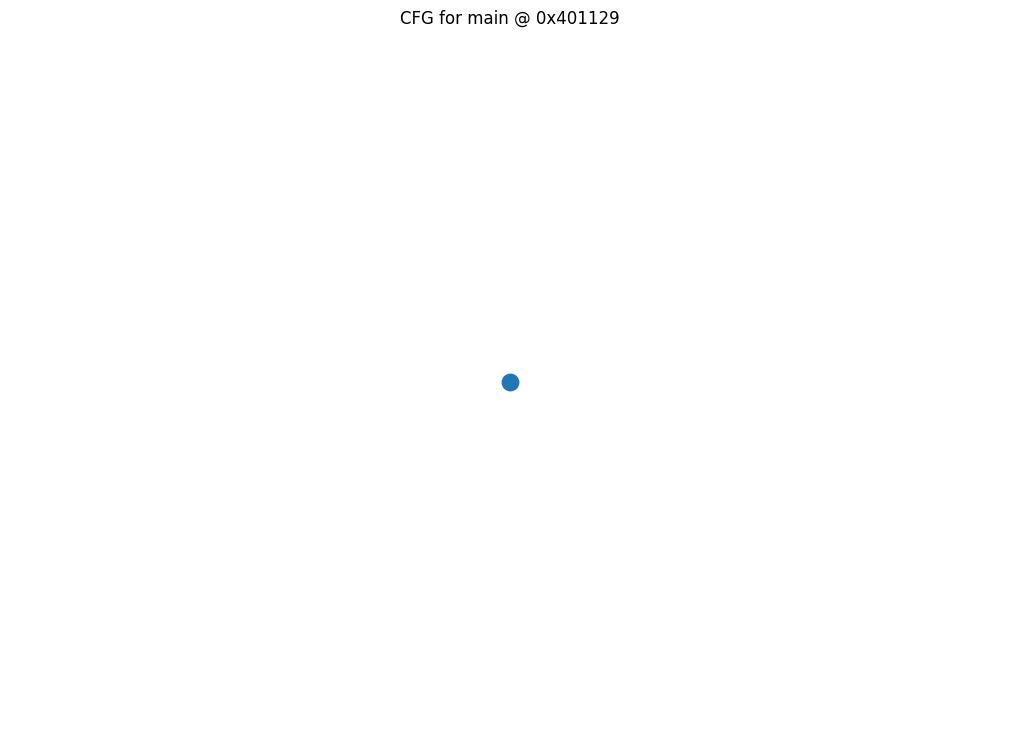

In [24]:
import angr
import networkx as nx
import matplotlib.pyplot as plt

proj = angr.Project("tiny_binary", auto_load_libs=False)
cfg = proj.analyses.CFGFast()

print("Functions found:", len(cfg.kb.functions))

# Try main; if missing, pick first discovered function
func = cfg.kb.functions.function(name="main") or next(iter(cfg.kb.functions.values()))
print("Using function:", func.name, hex(func.addr))

G = nx.DiGraph(func.graph)  # CFG graph for that function

plt.figure(figsize=(10, 7))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, node_size=140, with_labels=False)
plt.title(f"CFG for {func.name} @ {hex(func.addr)}")
plt.show()


In [25]:
cg = cfg.kb.callgraph  # networkx DiGraph
print("Call graph nodes:", cg.number_of_nodes())
print("Call graph edges:", cg.number_of_edges())

# Print a few edges (addresses)
for u, v in list(cg.edges())[:30]:
    print(hex(u), "->", hex(v))


Call graph nodes: 20
Call graph edges: 16
0x401070 -> 0x601050
0x4010a0 -> 0x601050
0x401040 -> 0x500000
0x500000 -> 0x401129
0x401000 -> 0x601058
0x4010e0 -> 0x401070
0x4010e0 -> 0x401030
0x401120 -> 0x4010a0
0x401030 -> 0x601050
0x401020 -> 0x601050
0x40102d -> 0x401030
0x401066 -> 0x401070
0x401099 -> 0x4010a0
0x4010d9 -> 0x4010e0
0x401115 -> 0x4010e0
0x401119 -> 0x401120


In [26]:
!gcc -O0 -fno-pie -no-pie -o tiny_binary tiny.c
!objdump -d -Mintel tiny_binary | grep -n "<main>" -n


97:0000000000401106 <main>:
